# Mini-Projeto: Simulação de Jogo de Dados
## Objetivo

Criar uma simulação para um jogo de dados. Essa simulação tem como objetivo reunir estatísticas para analisar a justiça do jogo, possíveis resultados e fazer previsões sobre jogos futuros.

## Desafios do Projeto

1. **Simulação de Dados**: Crie uma função que simule o lançamento de dois dados de seis lados (valores de 1 a 6). Esta função deve retornar a soma dos resultados dos dados.

2. **Múltiplas Simulações**: Use a função do passo 1 para simular um grande número de jogos de dados (digamos, 1000 jogos). Armazene o resultado de cada jogo em um array NumPy.

3. **Análise de Dados**: Agora, vamos analisar os resultados desses jogos. Calcule e imprima o seguinte:
- A média dos resultados.
- O lançamento máximo e mínimo.
- O número de vezes que cada possível lançamento (2, 3, 4, 5, 6, 7, 8, 9, 10, 11 e 12) ocorreu.
- Teste de Hipótese: Agora vamos fazer um pouco de teste de hipóteses:
  - Supondo um jogo justo (ou seja, todos os lançamentos são igualmente prováveis), o resultado da sua simulação coincide com essa suposição? Por que sim ou por que não?
  - O que isso significa para um jogador do jogo de dados?

In [1]:
def lancamento_dados(N):
  '''Esta função tem como objetivo simular o lançamento de 2 dados
  e então somar o resultado obtido'''

  #Gerando dois valores random para 2 dados de face 1-6
  #Obs.: High value do randint é excludente-> por isso 7
  dados=np.random.randint(1,7, size=(N,2))
  return np.sum(dados,axis=1)#soma

In [2]:
import numpy as np

try:
  qtde_vezes=int(input('Quantos jogos ocorreram? (Ex.: 1000) '))
except:
  print('Por favor, insira um número inteiro.')
  qtde_vezes=int(input('Quantos jogos ocorreram? (Ex.: 1000) '))

multiplas_simu=lancamento_dados(qtde_vezes)

Quantos jogos ocorreram? (Ex.: 1000) 1000


In [3]:
#Média dos Resultados
media=multiplas_simu.mean()
print(f'Média dos Resultados: {media:.2f}')

#Lançamento Máximo e Mínimo
maximo=multiplas_simu.max()
print(f'Lançamento Máximo: {maximo}')

minimo=multiplas_simu.min()
print(f'Lançamento Mínimo: {minimo}')

#O número de vezes que cada possível lançamento ocorreu
nr_vezes=np.unique(multiplas_simu, return_counts=True)
dict_nr_elementos=dict(zip(nr_vezes[0],nr_vezes[1]))

#Adicionando as somas que não ocorreram como chave, possuindo elemento igual a 0
#(Caso ocorra para qtde de simulações baixa)
for i in range (2,13):
  if i not in dict_nr_elementos.keys():
    dict_nr_elementos[i]=0

dictlancamentos=dict(sorted(dict_nr_elementos.items()))
print(f'Número de vezes que cada possível lançamento ocorreu: \n{dictlancamentos}')


Média dos Resultados: 6.82
Lançamento Máximo: 12
Lançamento Mínimo: 2
Número de vezes que cada possível lançamento ocorreu: 
{2: 33, 3: 66, 4: 82, 5: 109, 6: 151, 7: 168, 8: 144, 9: 115, 10: 57, 11: 53, 12: 22}


##Teste de Hipótese

De forma lúdica, temos as seguintes probabilidades ao somar o resultado de 2 de dados:


| Resultado | Combinações        |
|---------  |-----------------|
|    2      | (1,1)            |
|    3      | (1,2),(2,1)      |
|    4      | (1,3),(3,1),(2,2)   |
|    5      | (2,3),(3,2),(1,4),(4,1)         |
|    6      | (1,5),(5,1),(2,4),(4,2),(3,3) |
|    7      | (1,6),(6,1),(2,5),(5,2),(3,4),(4,3)           |
|    8     | (2,6),(6,2),(3,5),(5,3),(4,4)        |
|    9     | (6,3),(3,6),(4,5),(5,4)        |
|    10     | (4,6),(6,4),(5,5)        |
|    11     | (6,5),(5,6)        |
|    12     | (6,6)


Isto resulta em 36 combinações. Então a probabilidade de sair cada soma em um lançamento é:

| Resultado | Combinações                        | Probabilidade|
|-----------|------------------------------------|--------------|
|    2      | (1,1)                              | 1/36         |
|    3      | (1,2),(2,1)                        | 2/36         |
|    4      | (1,3),(3,1),(2,2)                  | 3/36         |
|    5      | (2,3),(3,2),(1,4),(4,1)            | 4/36         |
|    6      | (1,5),(5,1),(2,4),(4,2),(3,3)      | 5/36         |
|    7      | (1,6),(6,1),(2,5),(5,2),(3,4),(4,3)| 6/36         |
|    8      | (2,6),(6,2),(3,5),(5,3),(4,4)      | 5/36         |
|    9      | (6,3),(3,6),(4,5),(5,4)            | 4/36         |
|    10     | (4,6),(6,4),(5,5)                  | 3/36         |
|    11     | (6,5),(5,6)                        | 2/36         |
|    12     | (6,6)                              | 1/36         |


Logo não há a possibilidade da probabilidade ser igual em todos os casos e é o que a simulação e a probabilidade mostra.

Agora vamos calcular a probabilidade para multiplos eventos:

In [4]:
#Calculando o resultado esperado lançando múltiplas vezes 2 dados através da
#probabilidade
prob=np.array([1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/35, 3/36, 2/36, 1/36])*qtde_vezes

#Arredondando os valores obtidos
prob=np.rint(prob)

dict_res_esperado=dict(zip(nr_vezes[0],prob))
print(f' Resultado esperado lançando múltiplas vezes 2 dados através da probabilidade: \n{dict_res_esperado}')

 Resultado esperado lançando múltiplas vezes 2 dados através da probabilidade: 
{2: 28.0, 3: 56.0, 4: 83.0, 5: 111.0, 6: 139.0, 7: 167.0, 8: 139.0, 9: 114.0, 10: 83.0, 11: 56.0, 12: 28.0}


Assim, temos a quantidade de resultados esperados em relação a soma de 2 dados lançados múltiplas vezes, através da probabilidade de cada soma ocorrer.

Agora, vamos plotar a distribuição obtida versus a esperada para analisarmos:

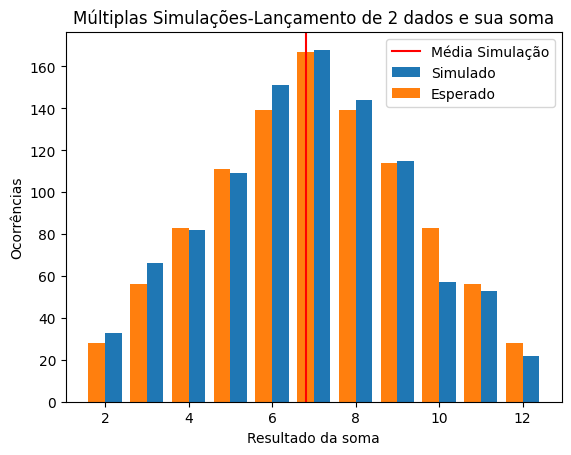

In [18]:
import matplotlib.pyplot as plt

#Visualizando a distribuição de probabilidades

#passando as chaves para array para poder deslocar o eixo x e plotar barras
#agrupadas
chave1=np.array(list(dictlancamentos.keys()))
chave2=np.array(list(dict_res_esperado.keys()))

plt.bar(chave1+ 0.2, dictlancamentos.values(),0.4,label = 'Simulado')
plt.axvline(x=media, color='red', label='Média Simulação')
plt.bar(chave2- 0.2, dict_res_esperado.values(),0.4,label = 'Esperado')
plt.xlabel('Resultado da soma')
plt.ylabel('Ocorrências')
plt.legend()
plt.title('Múltiplas Simulações-Lançamento de 2 dados e sua soma')
plt.show ()

Vemos que a ocorrência esperada através do cálculo de probabilidade de uma certa soma ocorrer em múltiplos lançamentos, versus a simulação realizada resultou em ocorrências muito próximas.

Outro ponto é que visualizando a distribuição de probabilidades, podemos observar que ela se assemelha a de uma distribuição normal, sendo observado em fenômenos naturais. Logo, para um jogador de dados, é preferível apostar na soma 7, pois a probabilidade de sair esta soma é maior. Outro ponto é que a média avalia uma tendência central. Neste caso ela está bem centralizada no meio e na soma 7, reforçando este ponto.

Portanto o modelo elaborado para gerar resultados esperados ao lançar 2 dados é bem próximo do resultado em uma simulação real. Mas vamos utilizar um teste de hipótese para validar, de fato este ponto.


Irei utilizar o teste Qui-quadrado que avalia as diferenças entre os valores simulados e esperado e então availiar o p-valor diante da seguinte hipótese:

1.   Hipótese Nula (H0): Os dados seguem a distribuição teórica das probabilidades esperadas para um lançamento justo de dois dados.
2.   Hipótese Alternativa (H1): Os dados não seguem a distribuição teórica das probabilidades esperadas para um lançamento justo de dois dados.

Para isso, precisamos de um dataframe ou matriz. Irei utilizar o dataframe para este caso.

In [8]:
import pandas as pd

#Transformando os dicts em tabelas com pandas
dflancamentos=pd.DataFrame.from_dict(dictlancamentos,orient='index',columns=['Simulado'])
dfesperado=pd.DataFrame.from_dict(dict_res_esperado,orient='index',columns=['Esperado'])

#Observando os dataframes através das primeiras linhas
#dflancamentos.head()
dfesperado.head()

,Esperado
2,28.0
3,56.0
4,83.0
5,111.0
6,139.0


In [9]:
#Concatenando os dois dataframes criados
ctab=pd.concat([dflancamentos,dfesperado], axis=1)

ctab.head()

,Simulado,Esperado
2,33,28.0
3,66,56.0
4,82,83.0
5,109,111.0
6,151,139.0


Agora que já temos o dataframe, vamos aplicá-lo do teste qui-quadrado:

In [15]:
import scipy.stats as stats

#Chi-square test ou teste Qui-quadrado
#chi=teste estatístico
#p=pvalue
#dof=degrais de liberdade
#exp=frequência esperada
chi, p, dof, exp=stats.chi2_contingency(ctab)
print(f'Valor de Qui-quadrado (χ²)= {chi:.2f}')
print(f'p-valor= {p*100:.2f} %')

Valor de Qui-quadrado (χ²)= 7.47
p-valor= 68.05 %


Em estatística, podemos rejeitar a hipótese nula se o p-valor for menor do que 5 %.

Utilizando o nível de significância de 5% e tendo que p-valor>5%, então **não** podemos rejeitar a hipótese nula de que os dados seguem a distribuição teórica das probabilidades esperadas para um lançamento justo de dois dados.

Desde modo, foi provado também através do teste de hipótese que o lançamento de 2 dados N vezes não gera a mesma probabilidade para todas as somas, obedecendo as combinações, probabilidades e distribuição mencionados na tabela e gráfico acima.